<a href="https://colab.research.google.com/github/CharlyPierce/RNN/blob/main/RNN_google_accion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM-RNN

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds_t=pd.read_csv('Google_Stock_Price_Train.csv')
ds_te=pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
x=ds_t.iloc[:,1:2].values
y=ds_te.iloc[:,1:2].values
#usamos normalizacion

In [ ]:
#Normalización
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
xs=sc.fit_transform(x)
ys=sc.transform(x)

In [ ]:
#Crear una estructura de datos con 60 timesteps y 1 salida
#60 dias atras para predecir el valor de accion
x_t=[]
y_t=[]
for i in range(60,1257+1):
  x_t.append(xs[i-60:i,0])
  y_t.append(xs[i,0])
x_t,y_t=np.array(x_t),np.array(y_t)

In [ ]:
#dimesionalidad de estructura anterior
x_train=np.reshape(x_t,(x_t.shape[0],x_t.shape[1],1))
#la RNN necesita un tensor de 3 orden 
#en este caso en matriz con profundidad 1

In [ ]:
#arquitectura de la RNN acomulado
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
#inicializacion del modelo
regresor=Sequential()
regresor.add(LSTM(units=60,return_sequences=True,input_shape=(x_t.shape[1],1)))#No de celdas, neuronas,sequencia de retorno True
regresor.add(Dropout(rate=0.3))
#segunda capa de LSTM
regresor.add(LSTM(units=60,return_sequences=True))
regresor.add(Dropout(rate=0.2))
#tercera capa de LSTM
regresor.add(LSTM(units=60,return_sequences=True))
regresor.add(Dropout(0.2))
#ultima capa LSTM
regresor.add(LSTM(units=60,return_sequences=False))
regresor.add(Dropout(0.2))
#Capa de Salida Densa
regresor.add(Dense(units=1))

In [ ]:
#compilar
regresor.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#entrenar 
regresor.fit(x_train,y_t,epochs=200,batch_size=25)

Epoch 1/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0265 - accuracy: 0.0017
Epoch 2/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 3/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 4/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051 - accuracy: 0.0017
Epoch 5/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0045 - accuracy: 0.0017
Epoch 6/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0041 - accuracy: 0.0017
Epoch 7/200
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041 - accuracy: 0.0017
Epoch 8/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0038 - accuracy: 0.0017
Epoch 9/200
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0041 - accuracy: 0.0017
Epoch 10/200
1198/1198 [==============================] - 8s 6ms/step - l

In [ ]:
from sklearn.externals import joblib
joblib.dump(regresor,'RNN_google_accion2.pkl')
#reg=joblib.load('RNN_google_accion .pkl')

['RNN_google_accion2.pkl']

In [ ]:
#y/ys
ds_total=pd.concat((ds_t['Open'],ds_te['Open']),axis=0)#columna

In [ ]:
inputs=ds_total[len(ds_total)-len(ds_te)-60:].values
inputs=inputs.reshape(-1,1)
#escalar los datos
inputs=sc.transform(inputs)
x_te=[]
for i in range(60,80):
  x_te.append(inputs[i-60:i,0])
x_te=np.array(x_te)
x_te=np.reshape(x_te,(x_te.shape[0],x_te.shape[1],1))

In [ ]:
#prediccion de las predicciones
predicted_stock_price=regresor.predict(x_te)

In [ ]:
#invertir los datos
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [ ]:
s1=np.array((predicted_stock_price,y)).T
s2=np.reshape(s1,(20,2))
s2=pd.DataFrame(s2)

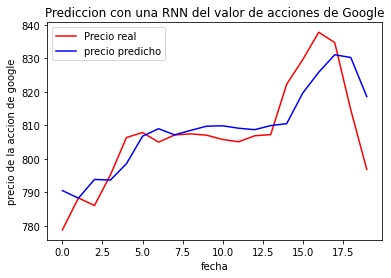

In [ ]:
plt.plot(y,color='red',label='Precio real')
plt.plot(predicted_stock_price,color='blue',label='precio predicho')
plt.title('Prediccion con una RNN del valor de acciones de Google')
plt.xlabel('fecha')
plt.ylabel('precio de la accion de google')
plt.legend()